# Example #3: Analyzing experimental data

This notebook will show a brief example of how QMix can be used to analyze experimental data. Note that a wide range of parameters can be passed to these functions in order to import data that has been stored in different formats.

For the purposes of this notebook, example data has been included in a directory called ``eg-230-data/``.

In [1]:
%matplotlib inline

import qmix
import numpy as np
import matplotlib.pyplot as plt

There are two main classes that can be used to analyze experimental data:
- ``qmix.exp.RawData0`` which is used for DC data (no LO pumping), and
- ``qmix.exp.RawData`` which is used to analyze pumped data.

## Import DC I-V data

This class will automatically load, filter, and analyze the DC I-V data. It will also automatically correct any offsets in the current or voltage data, and calculate the IF noise.

- ``dciv.csv`` is the DC current vs. bias voltage (no LO pumping)
- ``dcif.csv`` is the IF power vs. bias voltage (no LO pumping)

In [2]:
dciv = qmix.exp.RawData0('eg-230-data/dciv.csv', 'eg-230-data/dcif.csv')


DC I-V data: 
	Vgap:  		  2.72	mV
	fgap:  		658.44	GHz

	Rn:    		 13.41	ohms
	Rsg:   		364.09	ohms
	Q:     		 27.15

	Jc:    		 13.53	kA/cm^2
	Ileak: 		  8.70	uA

	Offset:		  0.10	mV
	       		  9.68	uV

	Vint:  		  0.45	mV
	IF noise:	  8.71	K



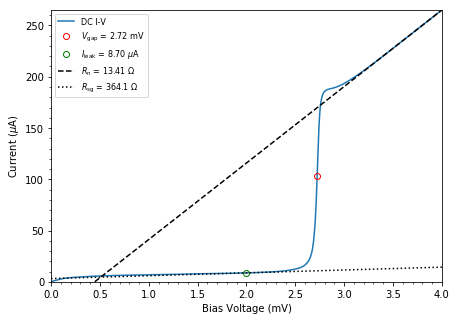

In [3]:
fig, ax = plt.subplots(figsize=(7,5))
dciv.plot_dciv(ax=ax);

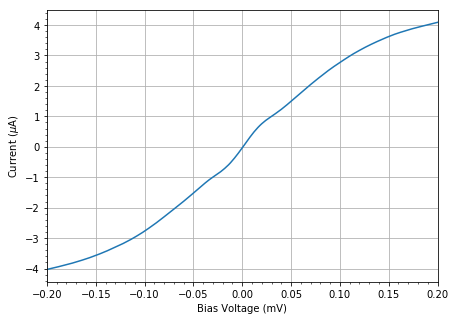

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
dciv.plot_offset(ax=ax);

This plot shows the DC tunnelling current at the origin. This plot can be used to ensure that the offsets in the x- and y-direction have been corrected properly.

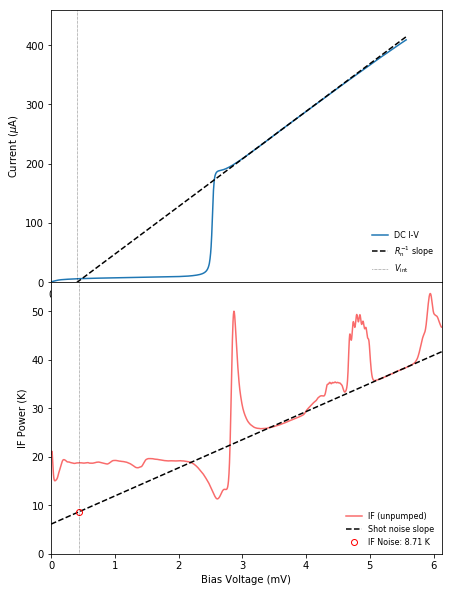

In [5]:
fig, ax = plt.subplots(2, figsize=(7,10))
dciv.plot_if_noise(ax=ax);

## Import Data at 230 GHz

This class will load data collected at a given frequency.
- ``f230.2_iv.csv`` is the pumped I-V curve
- ``f230.2_if-hot.csv`` is the IF power measured with the hot load
- ``f230.2_if-cold.csv`` is the IF power measured with the cold load

This class will automatically load, filter and analyze the data. This includes calculating the noise temperature and the properties of the embedding circuit.

In [6]:
pump = qmix.exp.RawData('eg-230-data/f230.2_iv.csv',
                        dciv,
                        if_hot_file='eg-230-data/f230.2_if-hot.csv',
                        if_cold_file='eg-230-data/f230.2_if-cold.csv')

Importing: 
 -> Files:
	I-V file:    	eg-230-data/f230.2_iv.csv
	IF hot file: 	eg-230-data/f230.2_if-hot.csv
	IF cold file:	eg-230-data/f230.2_if-cold.csv
 -> Frequency: 230.2 GHz
 -> Impedance recovery:
	- good fit
	- embedding circuit:
		- voltage:       +0.53  x Vgap
		- impedance:     +0.47-0.30j  x Rn
		- avail. power: +41.42  nW
	- junction:
		- alpha:         +0.93
		- impedance:     +0.75+0.08j  norm.
 -> Analyze IF data:
     - noise temp:         34.5 K
     - gain:              -1.07 dB



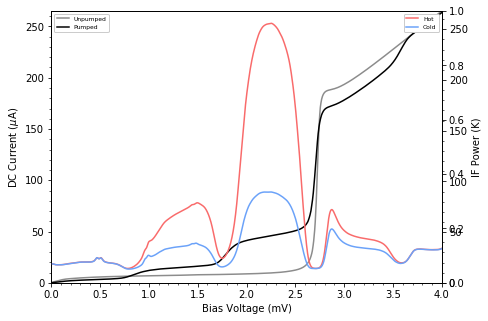

In [7]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
pump.plot_ivif(ax=(ax1,ax2));

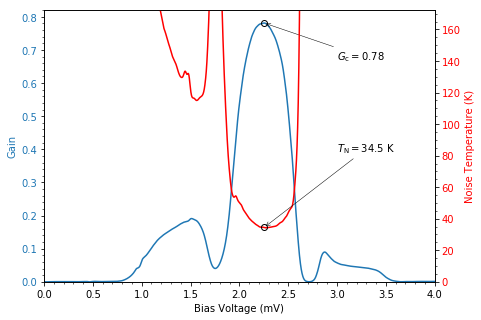

In [8]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx()
pump.plot_gain_noise_temp(ax=(ax1,ax2));

### Plot embedding impedance

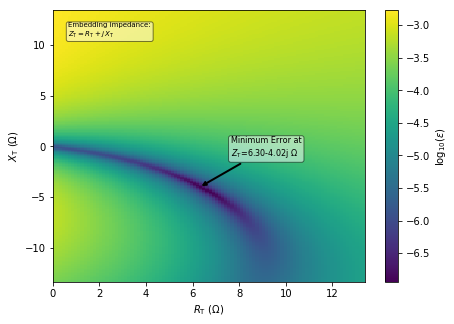

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
pump.plot_error_surface(ax=ax);

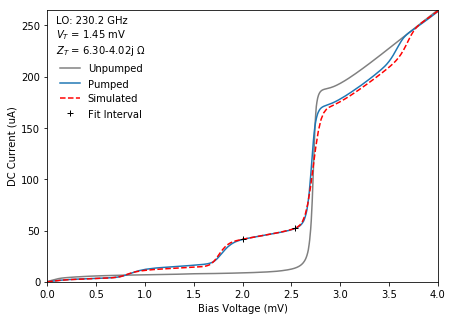

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
pump.plot_simulated(ax=ax);